## Parcial Final

In [446]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
import pandas as pd
import scipy.optimize as spo

## Teórico:

Partiendo de las siguientes premisas:
    
$$
\sum \vec F =m(\vec a +2 \vec w \times \vec v)\\
\vec w=[-wcos\lambda,0,wsin\lambda]\\
\vec r= [rcos\theta,rsin\theta,r]
$$

Y de que $wr=v$. Podemos obtener el vector de velocidad a partir de:


$$
\begin{equation}
\begin{split}
\vec v&=\vec w\times \vec r \\
&=\begin{pmatrix}
-wrsin\theta sin\lambda\\
wrcos\lambda\\
-wrcos\lambda sin\theta
\end{pmatrix}
\end{split}
\end{equation}
$$


De modo que se puede plantear la siguiente ecuación:

$$\begin{equation}
\begin{split}
-m\begin{pmatrix}
0\\
0\\
g
\end{pmatrix}
&= 
m\Big(\begin{pmatrix}
\ddot{x}\\
\ddot{y}\\
\ddot{z}
\end{pmatrix} + 2\begin{pmatrix}
-wcos\lambda\\
0\\
wsin\lambda
\end{pmatrix}\times \begin{pmatrix}
-wrsin\theta sin\lambda\\
wrcos\lambda\\
-wrcos\lambda sin\theta
\end{pmatrix}
\Big)\\
-\begin{pmatrix}
0\\
0\\
g
\end{pmatrix}&=\begin{pmatrix}
\ddot{x}\\
\ddot{y}\\
\ddot{z}
\end{pmatrix} +2\begin{pmatrix}
-w^2 r sin\lambda cos\lambda\\
w^2rsin^2\theta sen\theta + w^2rcos^2\lambda cos\theta\\
-w^2 r cos^2\lambda
\end{pmatrix}
\end{split}
\end{equation}
$$

De esta manera obtenemos el siguiente sistema de ecuaciones:

$$
\begin{equation}
\begin{split}
\ddot{x}&=2w^2rsin^2 \lambda cos \lambda \\
\ddot{y}&=-2w^2rcos^2\lambda sin\theta - 2w^2rsin\lambda sin\theta\\
\ddot{z}&=-g+2w^2rcos^2\lambda
\end{split}
\end{equation}
$$

Y teniendo en cuenta el vector de velocidad hallado previamente tenemos que:

$$
\begin{equation}
\begin{split}
\dot{x}&=wrsin\lambda sin\theta\\
\dot{y}&=wrcos\lambda\\
\dot{z}&=wrcos\lambda sin\theta
\end{split}
\end{equation}
$$

Por lo tanto, llegamos a:

$$
\begin{equation}
\begin{split}
\ddot{x}&=2wsin\lambda \dot{y}\\
\ddot{y}&=-2wcos\lambda \dot{z}-2wsin\lambda \dot{x}\\
\ddot{z}&=-g + 2wcos\lambda \dot{y}
\end{split}
\end{equation}
$$

## Parte 1

a, b)

In [447]:
datos=pd.read_csv('Datos.txt')
lam_30= datos[datos.angle==30]
lam_30

,h,angle,y,sigmay
20,10.0,30.0,0.0013,0.0015
21,20.0,30.0,0.0017,0.0015
22,30.0,30.0,0.0038,0.0015
23,40.0,30.0,0.0059,0.0015
24,50.0,30.0,0.0067,0.0015
25,60.0,30.0,0.0094,0.0015
26,70.0,30.0,0.0122,0.0015
27,80.0,30.0,0.0132,0.0015
28,90.0,30.0,0.0151,0.0015
29,100.0,30.0,0.0186,0.0015


c)

In [448]:
h_=sym.Symbol('h',real=True)
w_=sym.Symbol('w',real=True)
lamd=sym.Symbol('lambda',real=True)
g_=sym.Symbol('g',real=True)

def Coriolis_sym(h,w,lam,g):
    res=(2*(2**(1/2))/3) *w*sym.cos(lam)*((h**3)/g)**(1/2)
    return res

Coriolis_sym(h_,w_,lamd,g_)

0.942809041582063*w*(h**3/g)**0.5*cos(lambda)

In [449]:
def Coriolis_np(h,w,lam,g):
    ang=lam*2*np.pi/360
    res=(2*(2**(1/2))/3) *w*np.cos(ang)*((h**3)/g)**(1/2)
    return res

d)

In [450]:
def chi2(w,h,y,sigmay,angle,g):
    resp=np.sum((y-Coriolis_np(h,w,angle,g))**2 /(2*sigmay**2))
    return resp

e)

In [451]:
h=lam_30.h
y=lam_30.y
sigmay=lam_30.sigmay
angle=lam_30.angle
g=9.81

nll=lambda *w:chi2(*w)
p0=np.ones(1)


In [452]:
minimizar = spo.minimize( nll, p0, args=(h,y,sigmay,angle,g),options={'disp':True} )

bestparam=minimizar.x
bestparam


Optimization terminated successfully.
         Current function value: 1.145718
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4


array([7.24399804e-05])

f)

Text(0, 0.5, 'y[m]')

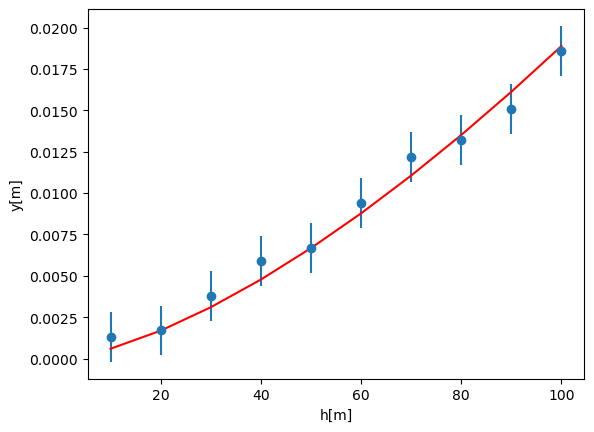

In [453]:
_x = np.linspace(np.min(h),np.max(h),10)
_y = Coriolis_np(_x,bestparam,angle,g)

plt.errorbar(h,y,yerr=sigmay,fmt='o')
plt.plot(_x,_y,color='r')
plt.xlabel('h[m]')
plt.ylabel('y[m]')

## Parte 2:
## Propagarción de la incertidumbre de la aceleración de la gravedad:

a, b, c, d, e)

In [454]:
y_arr=np.array(y)
h=np.array(h)
sigmay_arr=np.array(sigmay)
N=300

In [455]:
def Optimizar(lamb,y,h,sigmay):
    Gravedad=np.zeros(300)
    Omega=np.zeros(300)

    for i in range(N):
        g_i= 9.81+np.random.normal(loc=0,scale=1)
        y_n=y+np.random.normal(loc=0,scale=sigmay[0],size=len(y))
        Gravedad[i]=g_i
        optim = spo.minimize( nll, p0, args=(h,y_n,sigmay,lamb,g_i),options={'disp':True} )
        Omega[i]=optim.x
        
    return Omega,Gravedad


f)

In [456]:
def DistConjunta(Omega,Gravedad):
    binsx=np.linspace(min(Omega),max(Omega),33)
    binsy=np.linspace(min(Gravedad),max(Gravedad),33)
    H2,binsx,binsy = np.histogram2d(Omega,Gravedad,bins=(binsx,binsy))
    
    return H2,binsx,binsy

In [ ]:
Omega_30,Gravedad_30=Optimizar(30,y_arr,h,sigmay_arr)
H230,binsx30,binsy30=DistConjunta(Omega_30,Gravedad_30)
H230

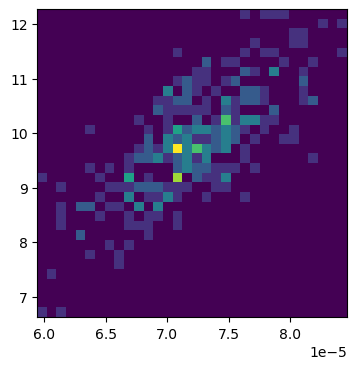

In [458]:
fig= plt.figure(figsize=(4,4))
plt.imshow(H230.T, origin='lower', extent=[binsx30[0], binsx30[-1], binsy30[0], binsy30[-1]], aspect='auto')


g)

Las variables sí están correlacionadas ya que en la gráfica se percibe una pendiente positiva. De modo que esto implica la correlación entre las variables implicadas.

h,i)

In [459]:
def Int_conf(H2,binsx):
    H1=np.sum(H2,axis=1)
    cs = np.cumsum(H1)
    ij = np.searchsorted( cs, np.percentile(cs,16) )
    ii = np.searchsorted( cs, np.percentile(cs,50) )
    ji = np.searchsorted( cs, np.percentile(cs,84) )  
    
    int_lower=binsx[ij]
    best_w=binsx[ii]
    int_upper=binsx[ji]
    
    return int_lower,int_upper,best_w


In [460]:
int_lower_30,int_upper_30,best_w= Int_conf(H230,binsx30)

int_lower_30,int_upper_30,best_w

(6.33982620931407e-05, 8.07145671397244e-05, 7.205641461643255e-05)

j)

In [461]:
omegas=[]
errores=[]

In [ ]:
latis=[10,20,30,40,50,60]

for j in range(1,7):
    lam_j=datos[datos.angle==latis[j-1]]
    h=np.array(lam_j.h)
    angle=np.array(lam_j.angle)
    sigmay=np.array(lam_j.sigmay)
    y=np.array(lam_j.y)
    
    Omega_j,Gravedad_j=Optimizar(j*10,y,h,sigmay)
    H2_j,binsx_j,binsy_j=DistConjunta(Omega_j,Gravedad_j)
    
    int_lower_j,int_upper_j,best_w_j= Int_conf(H2_j,binsx_j)
    
    omegas.append(best_w_j)
    errores.append([int_lower_j,int_upper_j])

In [463]:
omegas, errores

([6.87837503843625e-05,
  7.227522833595183e-05,
  7.338260498184409e-05,
  7.4639959012455e-05,
  6.50301676524565e-05,
  7.374887619589625e-05],
 [[5.965686632742961e-05, 7.791063444129539e-05],
  [6.184218150900373e-05, 8.270827516289992e-05],
  [6.335345990400403e-05, 8.341175005968417e-05],
  [6.511719879422978e-05, 8.41627192306802e-05],
  [5.1356401613973415e-05, 7.870393369093957e-05],
  [6.103815340106683e-05, 8.645959899072568e-05]])

In [464]:
Combinado=np.mean(omegas)
Combinado

7.131009776049435e-05

In [465]:
errores_new=[]
for i in range(len(errores)):
    prom=np.abs(errores[i][0]-errores[i][1])/2
    errores_new.append(prom)

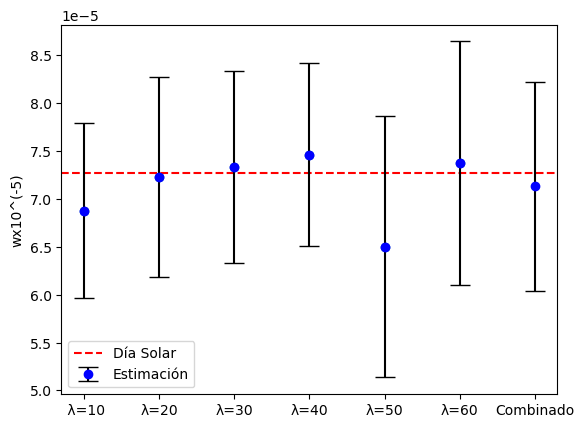

In [466]:
plt.scatter(latis,omegas)
plt.axhline(7.27e-5, linestyle = 'dashed', color = 'r', label="Día Solar")

for i in range(len(omegas)):
    ax = plt.errorbar(latis[i], omegas[i], yerr = errores_new[i], fmt="ob", capsize=7, ecolor="k")
    
plt.errorbar(70, Combinado, linestyle="None", yerr = np.sum(errores_new)/len(errores_new), fmt="ob", capsize=7, ecolor="k", label = "Estimación")
plt.xticks(latis + [70],[" λ=10", "λ=20", "λ=30", "λ=40", "λ=50", "λ=60", "Combinado"])
plt.ylabel('wx10^(-5)')
plt.legend()